In [6]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [7]:
from lifetimes.plotting import *
from lifetimes.utils import *

In [91]:
df=pd.read_excel('Online Retail.xlsx')
df2=df.copy()


In [4]:
df.keys()

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [8]:
df.shape

(541909, 8)

In [21]:
test=df['InvoiceDate'].apply(lambda x: str(x)[-11:-9])
test.value_counts()

InvoiceDate
08    24658
06    24182
07    22998
17    22805
05    22104
10    19946
04    19617
21    19244
20    19173
18    19129
11    18417
13    18270
09    18146
14    18085
23    17805
01    17531
28    17265
24    16888
02    16729
25    16232
22    16137
15    15690
16    15603
30    15415
27    15022
03    14495
12    14136
19    13181
29    11925
26    10563
31    10518
Name: count, dtype: int64

In [24]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'],yearfirst=True,format='%Y-%m-%d').dt.date

In [26]:
print('shape: ',df.shape)
df.isna().sum()

shape:  (541909, 8)


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [28]:
df=df.loc[pd.notnull(df['CustomerID'])]
df.shape

(406829, 8)

In [30]:
df=df.loc[df['Quantity']>0]
df.shape

(397924, 8)

In [31]:
df['Sales']=df['Quantity']*df['UnitPrice']
df.shape

(397924, 9)

In [34]:
cols=['CustomerID','InvoiceDate','Sales']
df=df[cols]
print(df.head())
print(df['CustomerID'].nunique())

   CustomerID InvoiceDate  Sales
0     17850.0  2010-12-01  15.30
1     17850.0  2010-12-01  20.34
2     17850.0  2010-12-01  22.00
3     17850.0  2010-12-01  20.34
4     17850.0  2010-12-01  20.34
4339


In [35]:
print("Number of unique customers: ",df['CustomerID'].nunique())
print("-"*30)
print(df.describe())
print("-"*30)
print("Starting date: ", df['InvoiceDate'].min())
print("Ending date: ",df['InvoiceDate'].max())

Number of unique customers:  4339
------------------------------
          CustomerID          Sales
count  397924.000000  397924.000000
mean    15294.315171      22.394749
std      1713.169877     309.055588
min     12346.000000       0.000000
25%     13969.000000       4.680000
50%     15159.000000      11.800000
75%     16795.000000      19.800000
max     18287.000000  168469.600000
------------------------------
Starting date:  2010-12-01
Ending date:  2011-12-09


###  components of Customer Lifetime Value (CLV) model  
1) Frequency--> number of repeated purchases (total-1)  
2) T= age of customer in whatever units specified   
3) Recency= age of customer at time of most recent purchase=time difference between first and last purchase  


Where T is default to 'days'

In [46]:
ltdata=summary_data_from_transaction_data(df,'CustomerID','InvoiceDate',
                                          monetary_value_col='Sales',
                                          observation_period_end='2011-12-9')
ltdata.head()

frequency  recency      T  monetary_value
CustomerID                                           
12346.0           0.0      0.0  325.0        0.000000
12347.0           6.0    365.0  367.0      599.701667
12348.0           3.0    283.0  358.0      301.480000
12349.0           0.0      0.0   18.0        0.000000
12350.0           0.0      0.0  310.0        0.000000

In [47]:
ltdata.columns=['frequency', 'recency', 'Duration-Days', 'monetary_value']

In [48]:
lifetime_dict={'measurement':[],'value':[]}
for i in ltdata.columns:
    
    mn=round(ltdata[i].min(),2)
    avg=round(ltdata[i].mean(),2)
    mx=round(ltdata[i].max(),2)
    lifetime_dict['measurement'].append(i)
    lifetime_dict['value'].append(" -"*3)
    lifetime_dict['measurement'].append(f'Minimum value {i}: ')
    lifetime_dict['value'].append(mn)
    lifetime_dict['measurement'].append(f'Average value {i}: ')
    lifetime_dict['value'].append(avg)
    lifetime_dict['measurement'].append(f'Maximum value {i}: ')
    lifetime_dict['value'].append(mx)
    lifetime_dict['measurement'].append('^v'*10)
    lifetime_dict['value'].append('^v'*5)
lifetime_df=pd.DataFrame(lifetime_dict)
display(lifetime_df)

measurement       value
0                        frequency       - - -
1        Minimum value frequency:          0.0
2        Average value frequency:         2.86
3        Maximum value frequency:        131.0
4             ^v^v^v^v^v^v^v^v^v^v  ^v^v^v^v^v
5                          recency       - - -
6          Minimum value recency:          0.0
7          Average value recency:       130.74
8          Maximum value recency:        373.0
9             ^v^v^v^v^v^v^v^v^v^v  ^v^v^v^v^v
10                   Duration-Days       - - -
11   Minimum value Duration-Days:          0.0
12   Average value Duration-Days:       222.78
13   Maximum value Duration-Days:        373.0
14            ^v^v^v^v^v^v^v^v^v^v  ^v^v^v^v^v
15                  monetary_value       - - -
16  Minimum value monetary_value:          0.0
17  Average value monetary_value:       306.94
18  Maximum value monetary_value:     168469.6
19            ^v^v^v^v^v^v^v^v^v^v  ^v^v^v^v^v

In [49]:
for i in ltdata.columns:
    print(f'Percentage of customers who have {i} value as 0: {round(ltdata.loc[ltdata[i]<=0].shape[0]/ltdata.shape[0]*100,2)}%')

Percentage of customers who have frequency value as 0: 35.7%
Percentage of customers who have recency value as 0: 35.7%
Percentage of customers who have Duration-Days value as 0: 0.02%
Percentage of customers who have monetary_value value as 0: 35.7%


C:\Users\user\AppData\Local\Temp\ipykernel_1724\2569273785.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\user\AppData\Local\Temp\ipykernel_1724\2569273785.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\user\AppData\Local\Temp\ipykernel_1724\2569273785.py:4: UserWarning:



`distplot` is a dep

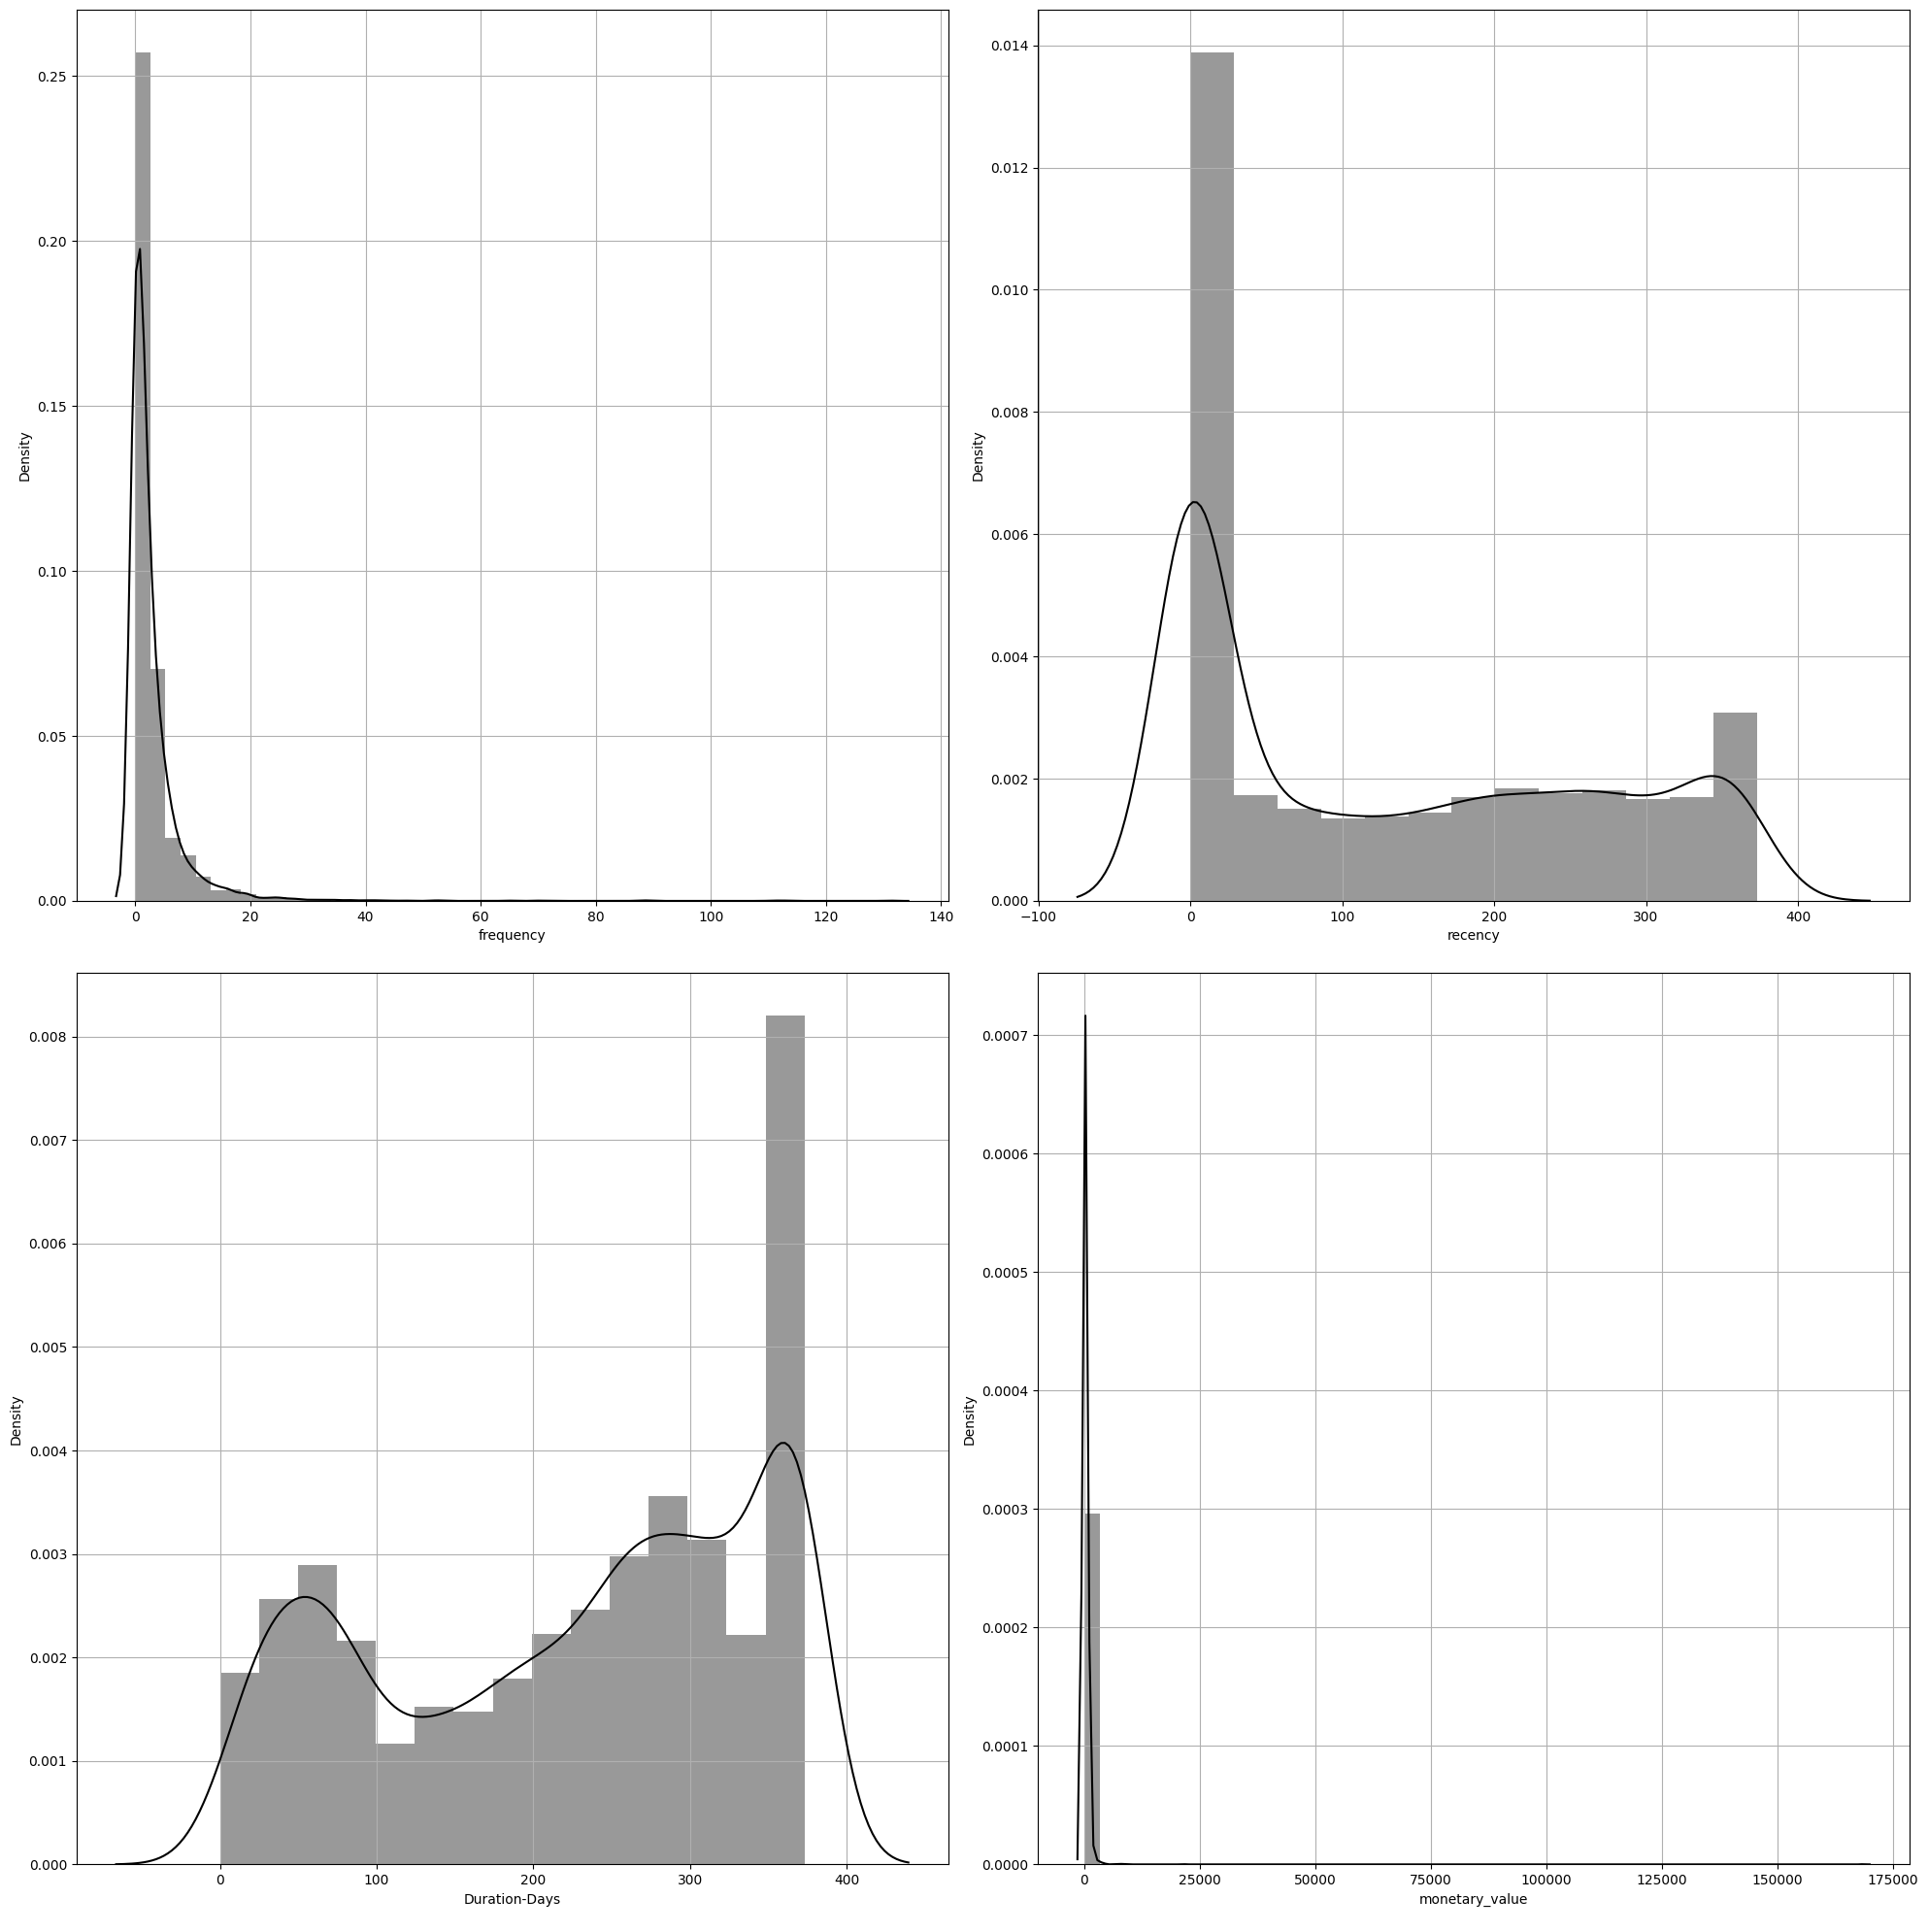

In [52]:
plt.figure(figsize=(20,20))
for i,v in enumerate(ltdata.columns):
    plt.subplot(2,2,i+1)
    sns.distplot(ltdata[v],color='black')
    plt.xlabel(v+'\n')
    plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
#frequency-recency matrix
#recenty=> age at last transaction
#frequency=>number of repeat transations
# for this, whe use BG-NBD model aka: BETA-GEOMETRIC or NEGATIVE BINOMIAL DISTRIBUTION
# to predict aggregate future transactions


## Frequency and Recency Analysis

In [53]:
from lifetimes import BetaGeoFitter
bgf=BetaGeoFitter(penalizer_coef=0.1)
bgf.fit(ltdata['frequency'],ltdata['recency'],ltdata['Duration-Days'])
print(bgf)
        

<lifetimes.BetaGeoFitter: fitted with 4339 subjects, a: 0.00, alpha: 49.41, b: 0.00, r: 0.59>


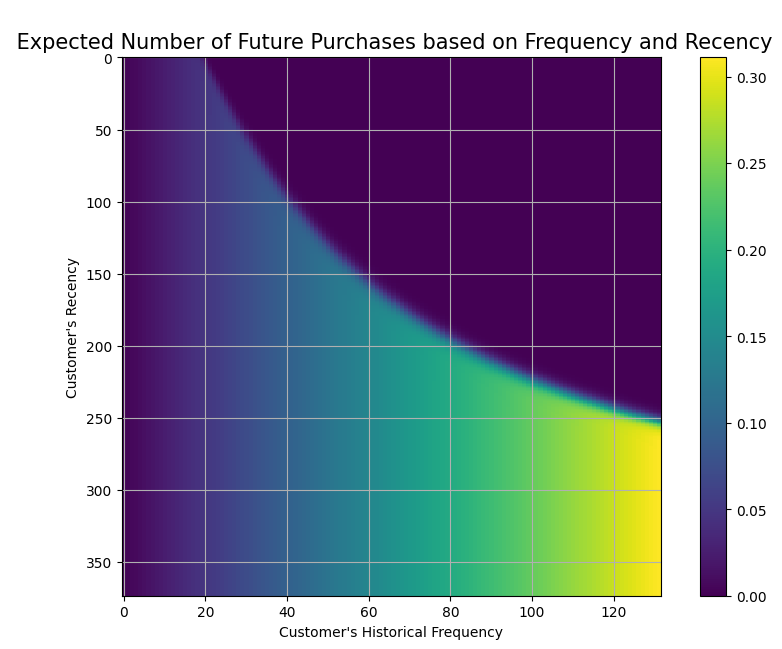

In [55]:
from lifetimes.plotting import plot_frequency_recency_matrix
plt.figure(figsize=(10,7))
plot_frequency_recency_matrix(bgf)
plt.title("\n Expected Number of Future Purchases based on Frequency and Recency",fontsize=15)
plt.grid()
plt.show()

## estimating the customers liveliness

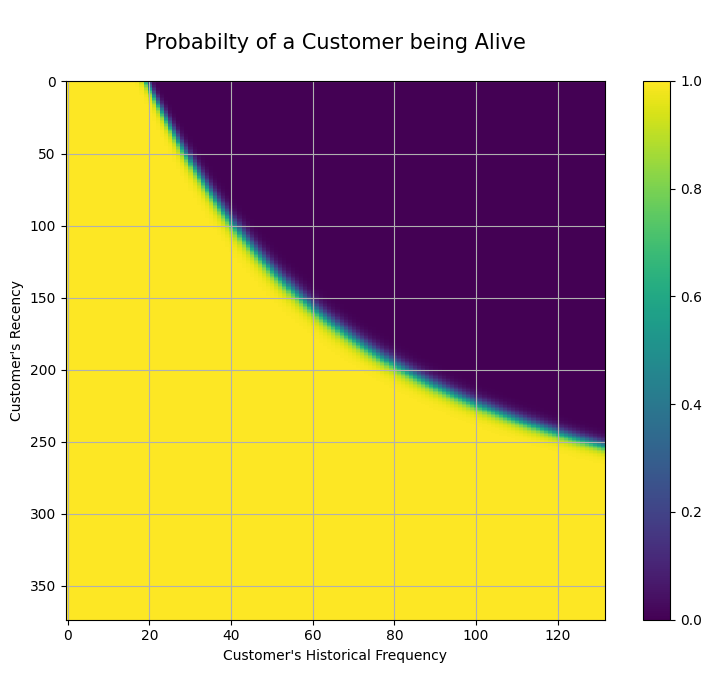

In [58]:
from lifetimes.plotting import plot_probability_alive_matrix
plt.figure(figsize=(10,7))
plot_probability_alive_matrix(bgf)
plt.title("\n Probabilty of a Customer being Alive \n",fontsize=15)
plt.grid()
plt.show()

## predict customer future purchases

In [59]:
#time value as 1
#conditional expected no. purchases upto time funciton
t=1
ltdata['predicted_purchase']=bgf.conditional_expected_number_of_purchases_up_to_time(t,
                                                                                     ltdata['frequency'],
                                                                                     ltdata['recency'],
                                                                                     ltdata['Duration-Days'])
ltdata.sort_values(by='predicted_purchase').tail()

frequency  recency  Duration-Days  monetary_value  \
CustomerID                                                      
14606.0          88.0    372.0          373.0      135.890114   
15311.0          89.0    373.0          373.0      677.729438   
17841.0         111.0    372.0          373.0      364.452162   
12748.0         113.0    373.0          373.0      298.360885   
14911.0         131.0    372.0          373.0     1093.661679   

            predicted_purchase  
CustomerID                      
14606.0               0.209731  
15311.0               0.212099  
17841.0               0.264180  
12748.0               0.268915  
14911.0               0.311527

## test accuracy

<Figure size 900x400 with 0 Axes>

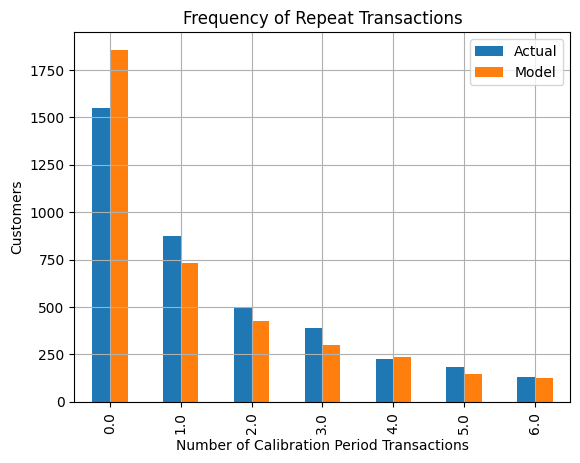

In [60]:
from lifetimes.plotting import plot_period_transactions
plt.figure(figsize=(9,4))
plot_period_transactions(bgf)
plt.grid()
plt.show()

calibration and test sets

In [61]:
from lifetimes.utils import calibration_and_holdout_data
summary_cal_holdout=calibration_and_holdout_data(df,'CustomerID',
                                                 'InvoiceDate',
                                                 calibration_period_end='2011-06-08',
                                                 observation_period_end='2011-12-9')
summary_cal_holdout.head()
                                                 

frequency_cal  recency_cal  T_cal  frequency_holdout  \
CustomerID                                                         
12346.0               0.0          0.0  141.0                0.0   
12347.0               2.0        121.0  183.0                4.0   
12348.0               2.0        110.0  174.0                1.0   
12350.0               0.0          0.0  126.0                0.0   
12352.0               3.0         34.0  112.0                3.0   

            duration_holdout  
CustomerID                    
12346.0                184.0  
12347.0                184.0  
12348.0                184.0  
12350.0                184.0  
12352.0                184.0

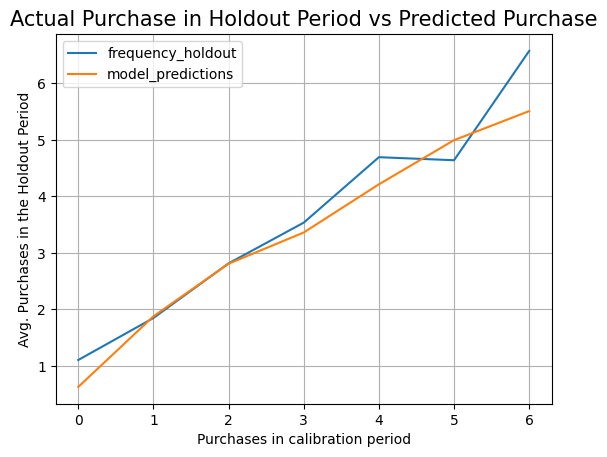

In [62]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases

import warnings
warnings.filterwarnings('ignore')
bgf.fit(summary_cal_holdout['frequency_cal'],
        summary_cal_holdout['recency_cal'],
        summary_cal_holdout['T_cal'])
plot_calibration_purchases_vs_holdout_purchases(bgf,summary_cal_holdout)
plt.ylabel('Avg. Purchases in the Holdout Period',fontsize=10)
plt.title('Actual Purchase in Holdout Period vs Predicted Purchase',fontsize=15)
plt.grid()
plt.show()
        

In [63]:
t=10
individual=ltdata.loc[12347]
print("Purchase Prediction for Customer ID: 12347: ",bgf.predict(t,individual['frequency'],
                                                                 individual['recency'],
                                                                 individual['Duration-Days']))
t=10
individual=ltdata.loc[12346]
print("Purchase Prediction for Customer ID: 12346: ",bgf.predict(t,individual['frequency'],
                                                                 individual['recency'],
                                                                 individual['Duration-Days']))


Purchase Prediction for Customer ID: 12347:  0.15929394518541742
Purchase Prediction for Customer ID: 12346:  0.01374695306201606


## Estimating customers lifetime value (CLV) 
 Gamma-Gamma model (Peter Veder and Bruce Harding from Warton)  
 predict amount per transaction in the future at customer level


In [64]:
# summarize data for returning customers
returning_customers_summary = ltdata.loc[ltdata['frequency']>0]
print("\nNumber of Returning Customers: ",len(returning_customers_summary))
print('-'*30)
print(returning_customers_summary.head())


Number of Returning Customers:  2790
------------------------------
            frequency  recency  Duration-Days  monetary_value  \
CustomerID                                                      
12347.0           6.0    365.0          367.0      599.701667   
12348.0           3.0    283.0          358.0      301.480000   
12352.0           6.0    260.0          296.0      368.256667   
12356.0           2.0    303.0          325.0      269.905000   
12358.0           1.0    149.0          150.0      683.200000   

            predicted_purchase  
CustomerID                      
12347.0               0.015834  
12348.0               0.008820  
12352.0               0.019089  
12356.0               0.006927  
12358.0               0.007991  


In [65]:
from lifetimes import GammaGammaFitter
ggf=GammaGammaFitter(penalizer_coef=0)
ggf.fit(returning_customers_summary['frequency'],
        returning_customers_summary['monetary_value'])
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 2790 subjects, p: 2.10, q: 3.45, v: 485.57>


In [66]:
X=ggf.conditional_expected_average_profit(
    ltdata['frequency'],
    ltdata['monetary_value'])
X.head()

CustomerID
12346.0    416.917667
12347.0    569.988807
12348.0    333.762672
12349.0    416.917667
12350.0    416.917667
dtype: float64

In [87]:
X.name = 'expected_CLV'  # Assign a name to the Series
data = pd.merge(ltdata, X, how='inner', left_index=True, right_index=True)
data['abs(obs-exp)']=abs(data['monetary_value']-data['expected_CLV'])
data.head()

frequency  recency  Duration-Days  monetary_value  \
CustomerID                                                      
12346.0           0.0      0.0          325.0        0.000000   
12347.0           6.0    365.0          367.0      599.701667   
12348.0           3.0    283.0          358.0      301.480000   
12349.0           0.0      0.0           18.0        0.000000   
12350.0           0.0      0.0          310.0        0.000000   

            predicted_purchase expected_CLV abs(obs-exp)  
CustomerID                                                
12346.0               0.001585   416.917667   416.917667  
12347.0               0.015834   569.988807     29.71286  
12348.0               0.008820   333.762672    32.282672  
12349.0               0.008805   416.917667   416.917667  
12350.0               0.001651   416.917667   416.917667

In [89]:
data.loc[data['monetary_value']!=0]['abs(obs-exp)'].mean()

115.11042577247277

In [ ]:
# importing the Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# lets read the Data set
data = pd.read_excel('Online Retail.xlsx')


Shape of the Dataset : (541909, 9)


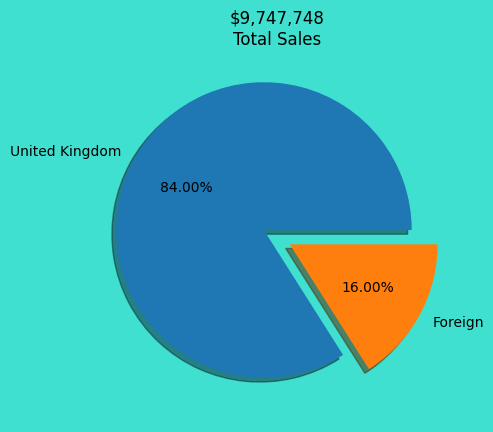

In [ ]:

# print the shape of the dataset
print("Shape of the Dataset :", data.shape)


In [ ]:
### Find out the Patterns in Transactions when the user was Foreigner
data['Sales']=data['Quantity']*data['UnitPrice']
country_df=data.groupby('Country',as_index=False)[['Quantity','Sales']].agg(['sum','mean','sem','count','max','min','median'])
total_quant=data['Quantity'].sum()
total_sales=data['Sales'].sum()
total_uk_sales=data.loc[data['Country']=='United Kingdom']['Sales'].sum()
total_foreign_sales=total_sales-total_uk_sales
pie_labels=['United Kingdom','Foreign']
pie_sizes=[total_uk_sales,total_foreign_sales]
plt.pie(pie_sizes,labels=pie_labels,autopct='%2.2f%%',shadow=True,explode=[.1,.1])
plt.title(f"${total_sales:,.0f}\nTotal Sales")
plt.gcf().set_facecolor('turquoise')
plt.show()
import warnings
warnings.filterwarnings("ignore")


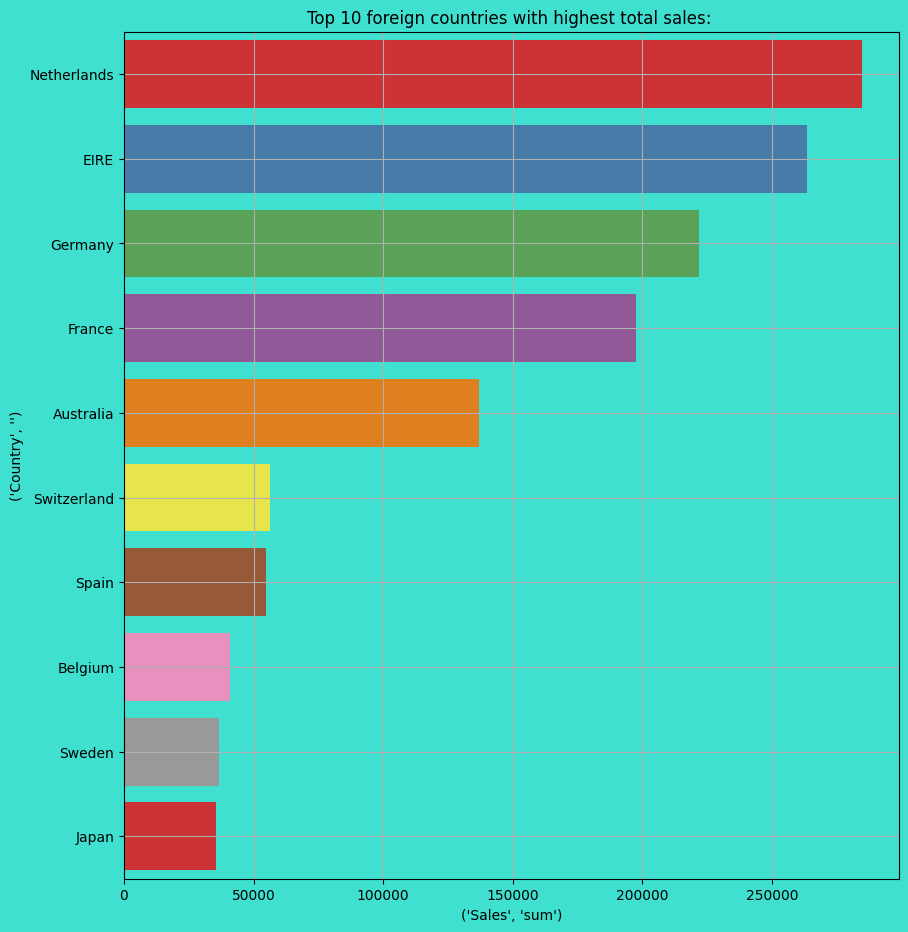

In [3]:

n=2
n2=11
plt.figure(figsize=(10,n2*1))
plt.title(f'Top {n2-1} foreign countries with highest total sales: ')
plot_data=country_df[[('Country',''),('Sales','sum')]].sort_values(by=('Sales','sum'),ascending=False).reset_index(drop=True).head(n2).tail(n2-1)
sns.barplot(x=plot_data[('Sales','sum')],y=plot_data[('Country','')],palette='Set1')
plt.gcf().set_facecolor('turquoise')
plt.gca().set_facecolor('turquoise')
plt.grid()
plt.show()


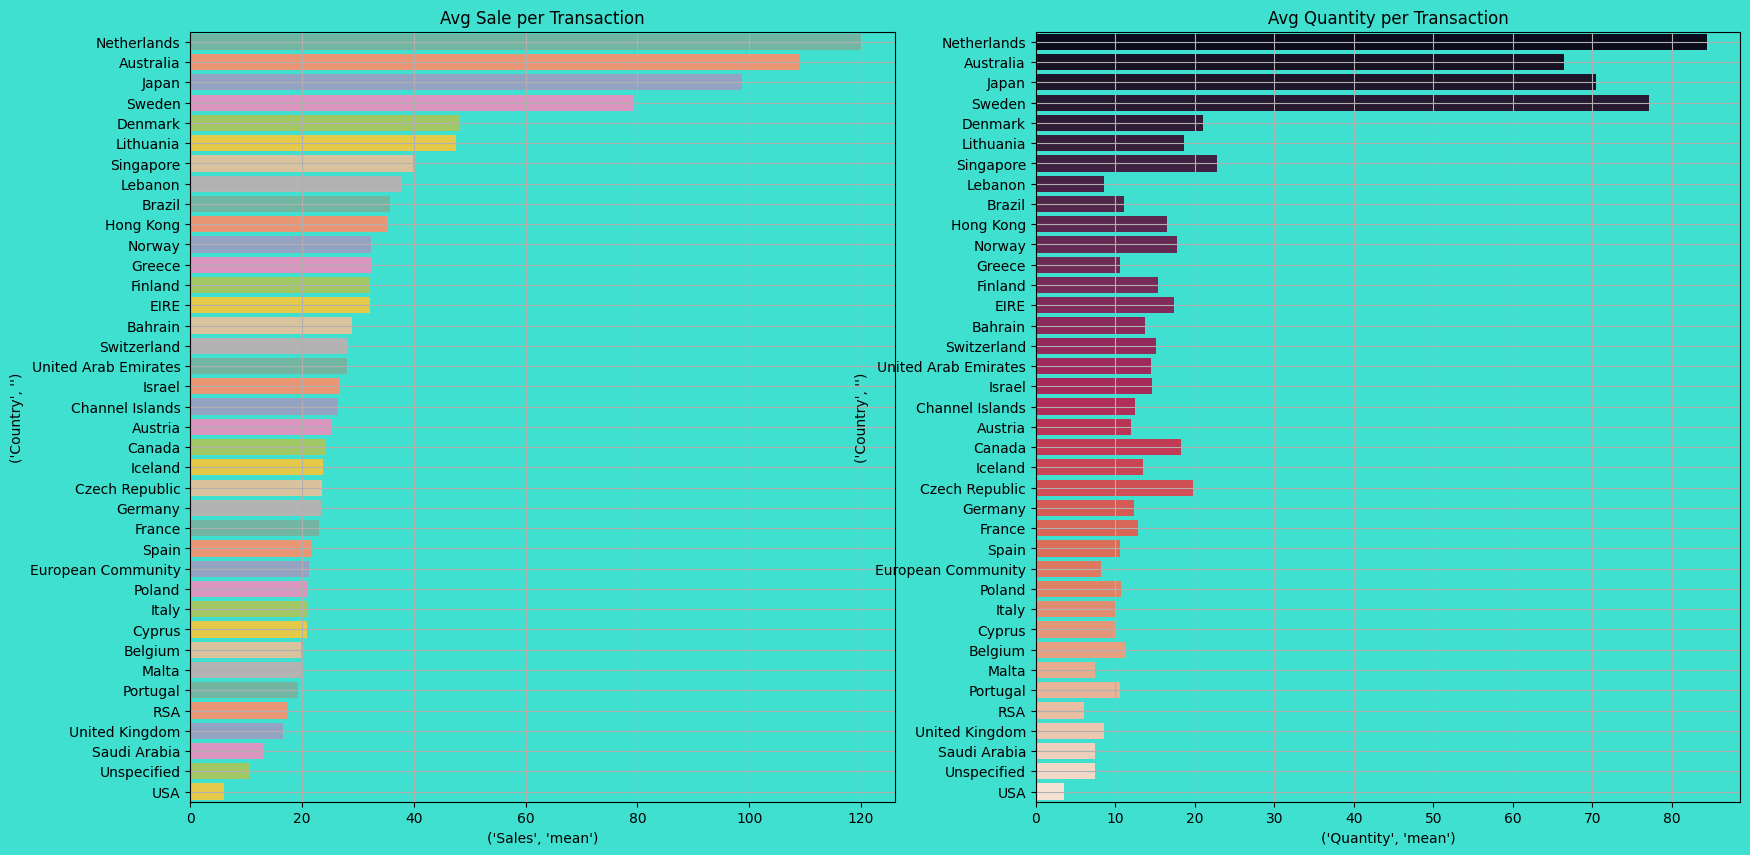

In [4]:

# a look at averages per purchase
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Avg Sale per Transaction')
country_df=country_df.sort_values(by=('Sales','mean'),ascending=False)
sns.barplot(x=country_df[('Sales','mean')],y=country_df[('Country','')],palette='Set2')
plt.gcf().set_facecolor('turquoise')
plt.gca().set_facecolor('turquoise')
plt.grid()
plt.subplot(1,2,2)
plt.title('Avg Quantity per Transaction')
sns.barplot(x=country_df[('Quantity','mean')],y=country_df[('Country','')],palette='rocket')
plt.gcf().set_facecolor('turquoise')
plt.gca().set_facecolor('turquoise')
plt.grid()
plt.show()


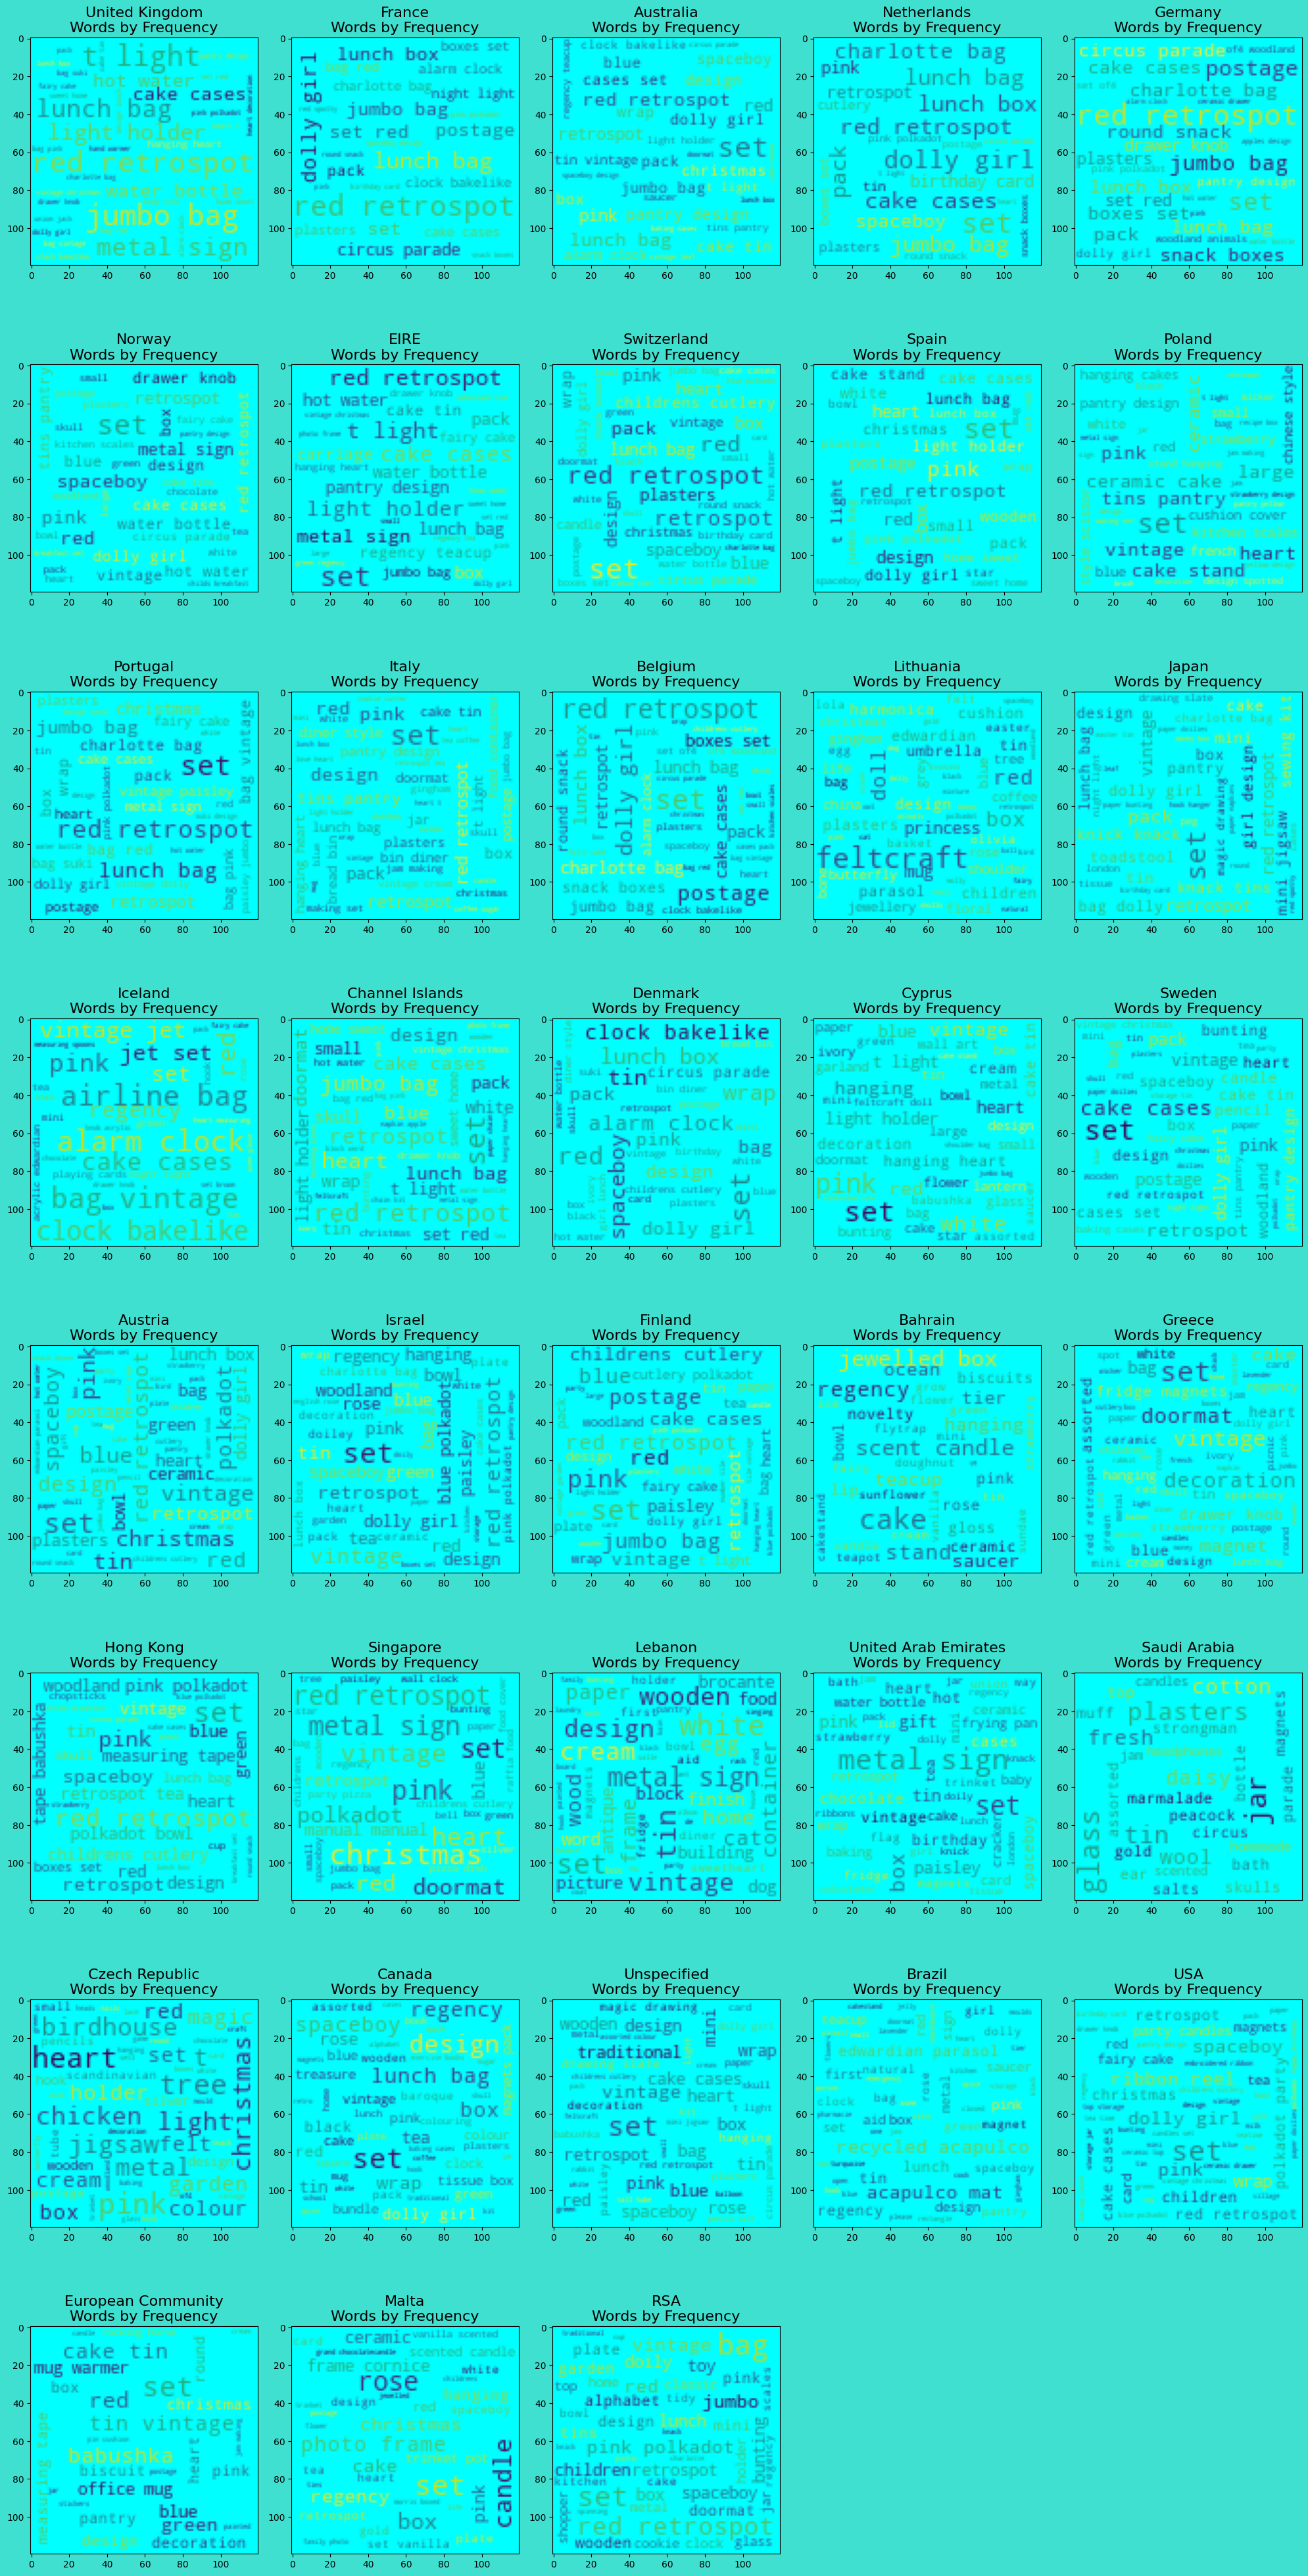

In [5]:

# Words in Description by Country by frequency

#WORDCLOUD
#note: wordcloud runs on 3.12
import wordcloud
from wordcloud import WordCloud
n=data['Country'].nunique()
row=8
col=5
plt.figure(figsize=(col*4,row*5))
for i,v in enumerate(data['Country'].unique()):
    plt.subplot(8,5,i+1)
    words=[]
    for row in data.loc[data['Country']==v]['Description']:
        if not row: continue
        row=str(row)
        for word in row.split():
            word=str(word)
            words.append(word.lower())
    wordcloud=WordCloud(max_font_size=15,width=120,height=120,background_color='cyan').generate(' '.join(words))
    plt.imshow(wordcloud)
    plt.title(f'{v}\nWords by Frequency',fontsize=16)    
    plt.gca().set_facecolor('turquoise')
plt.tight_layout()
plt.gcf().set_facecolor('turquoise')
plt.show()
